In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, RocCurveDisplay
from sklearn.metrics import recall_score, precision_score, f1_score

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/i/WrIIyMLiYctAPg')
# df = pd.read_csv('creditcard.csv')
df.head(12)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
df.tail(12)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,8.655320,-1.052365,2.834865,1.088141,1.288401,-0.931503,1.067864,0.586179,-0.085524,-0.571605,3.490065,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,-1.134176,0.677729,0.345928,0.002019,-0.679626,-0.549982,-0.199950,-0.420551,-0.283278,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(283726, 31)

In [8]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

Соотношение классов в датасете:

In [9]:
round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0],6)

0.00167

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


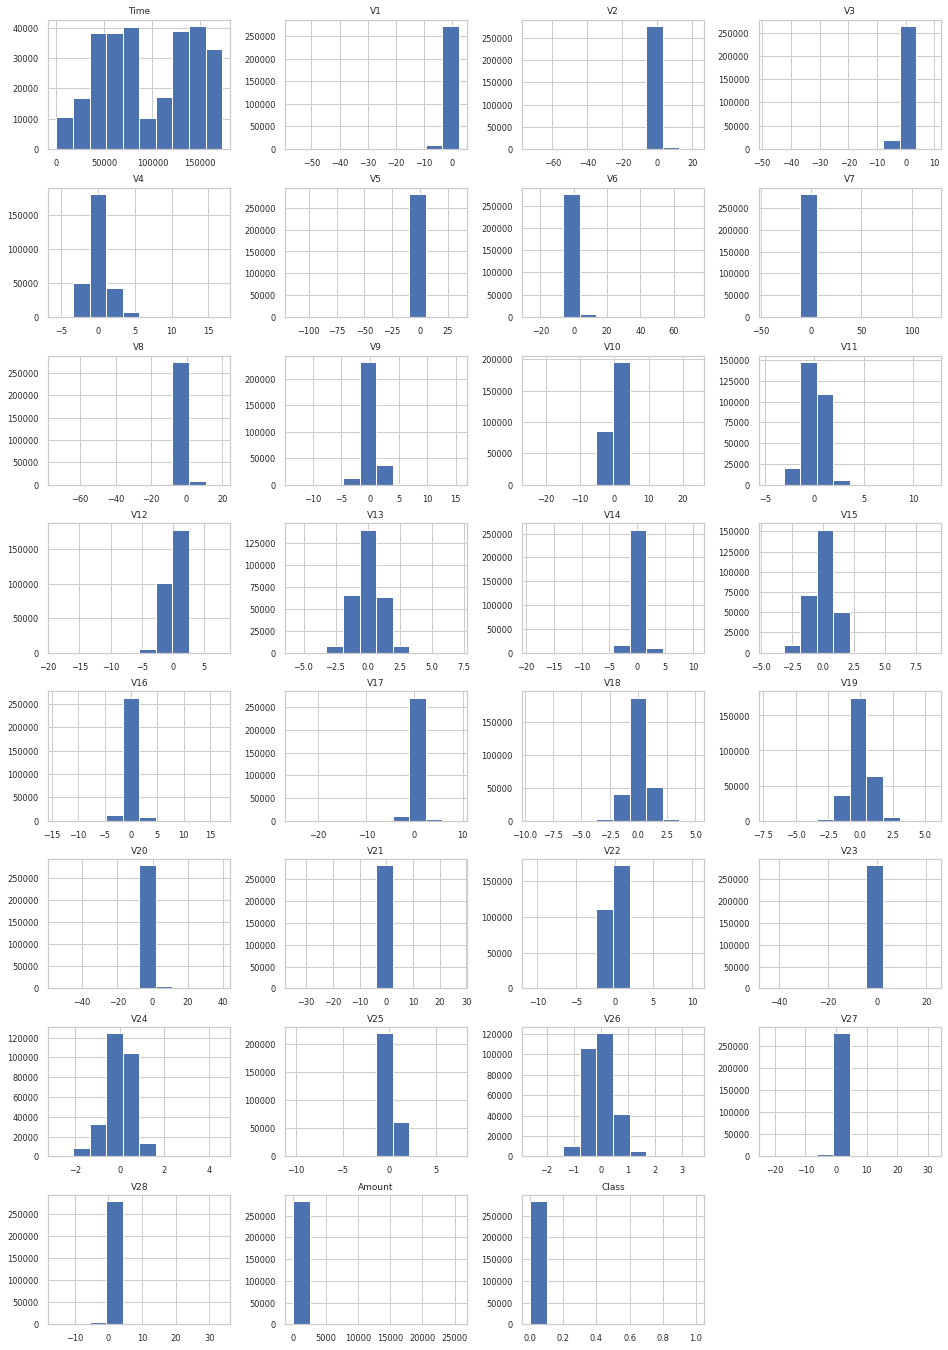

In [12]:
sns.set(style='whitegrid', font_scale=0.75)
df.hist(figsize=(16,24), layout=(-1,4));

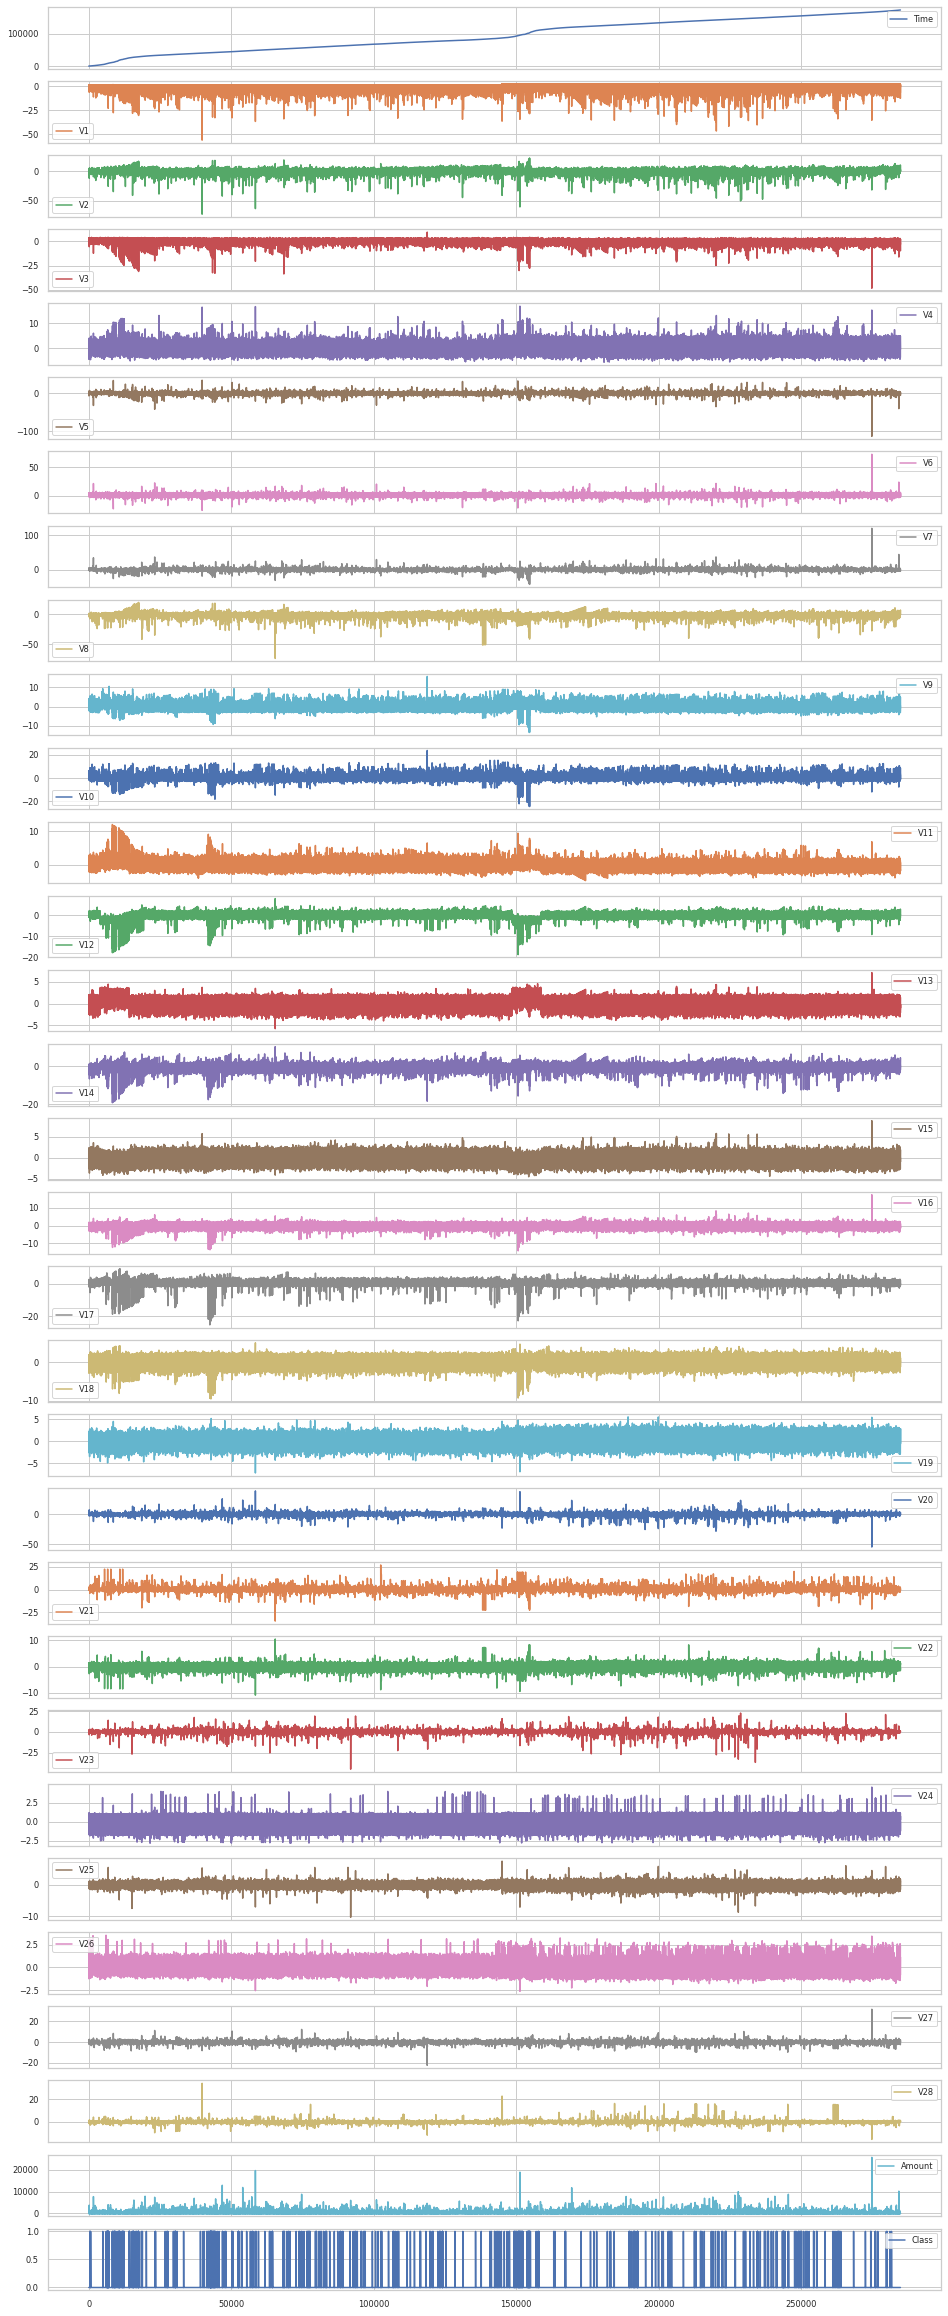

In [13]:
df.plot(subplots=True, figsize = (16, 42));

In [14]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
df[(df['Amount']>10000)]#&(df['Class']==0)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,-5.533256,1.446695,0.902675,1.746979,2.354131,0.801598,2.068475,1.413407,0.748320,-3.637371,26.237391,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,-5.545590,1.067549,0.832726,1.592166,2.788521,2.569520,2.721505,-0.613875,3.490798,-3.838863,24.133894,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,1.186360,1.879982,3.496723,4.082503,1.406178,0.773133,0.902964,5.041069,-7.213527,39.420904,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,-0.083514,-2.281866,3.739366,5.989210,2.582162,3.032874,0.530779,4.712398,-6.938297,38.117209,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,-5.341249,0.713033,1.361297,1.410760,2.969936,1.441114,1.134212,0.297532,1.340820,-4.392421,23.649095,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,6.853897,-9.189418,7.126883,-6.795942,8.877742,17.315112,-7.173805,-1.968044,5.501747,-54.497720,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,0.214173,-4.499851,0.241005,0.537895,2.901938,2.326099,-0.402142,1.257379,2.008145,2.454553,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


Аккуратно подчистим данные, так чтобы еще больше не уменьшить количество примеров миноритарного класса.
Вероятно, столбец Time нам не пригодится...т.к. является своего рода порядковой нумерацией всех примеров.

In [16]:
df.drop(index = df[df['Amount']>10000].index, inplace=True)

In [ ]:
# clevel = 8
# for column in df.columns[:-1]:
#     cvalue_high = df[column].mean()+clevel*df[column].std()
#     cvalue_low = df[column].mean()-clevel*df[column].std()
#     df.drop(index = df[df[column]>cvalue_high].index, inplace=True)
#     df.drop(index = df[df[column]<cvalue_low].index, inplace=True)

In [17]:
df.shape

(283719, 31)

In [18]:
df['Class'].value_counts()

0    283246
1       473
Name: Class, dtype: int64

In [19]:
df.drop('Time', axis = 1, inplace = True)

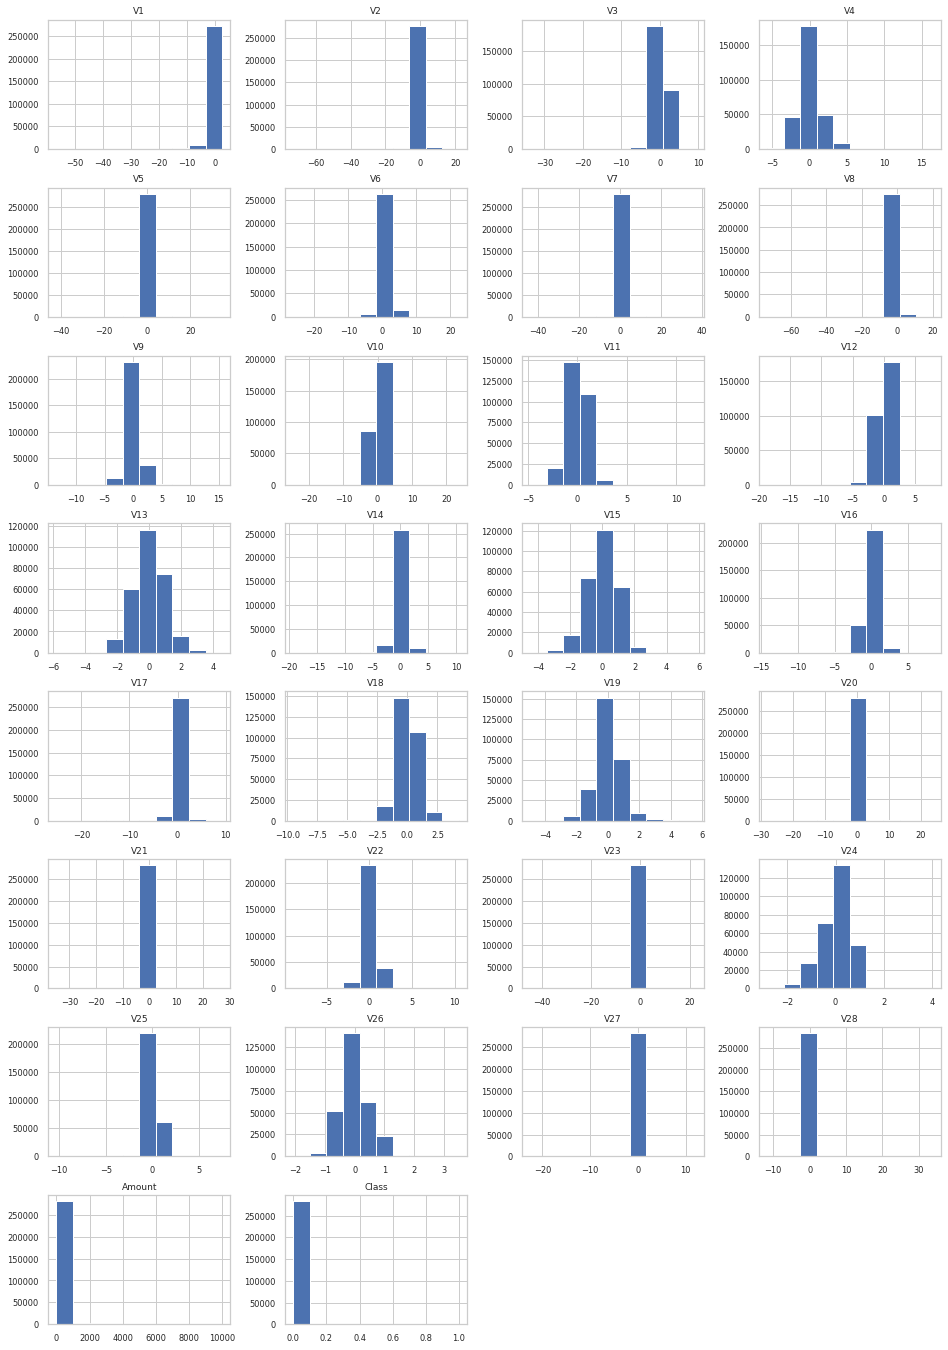

In [20]:
sns.set(style='whitegrid', font_scale=0.75)
df.hist(figsize=(16,24), layout=(-1,4));

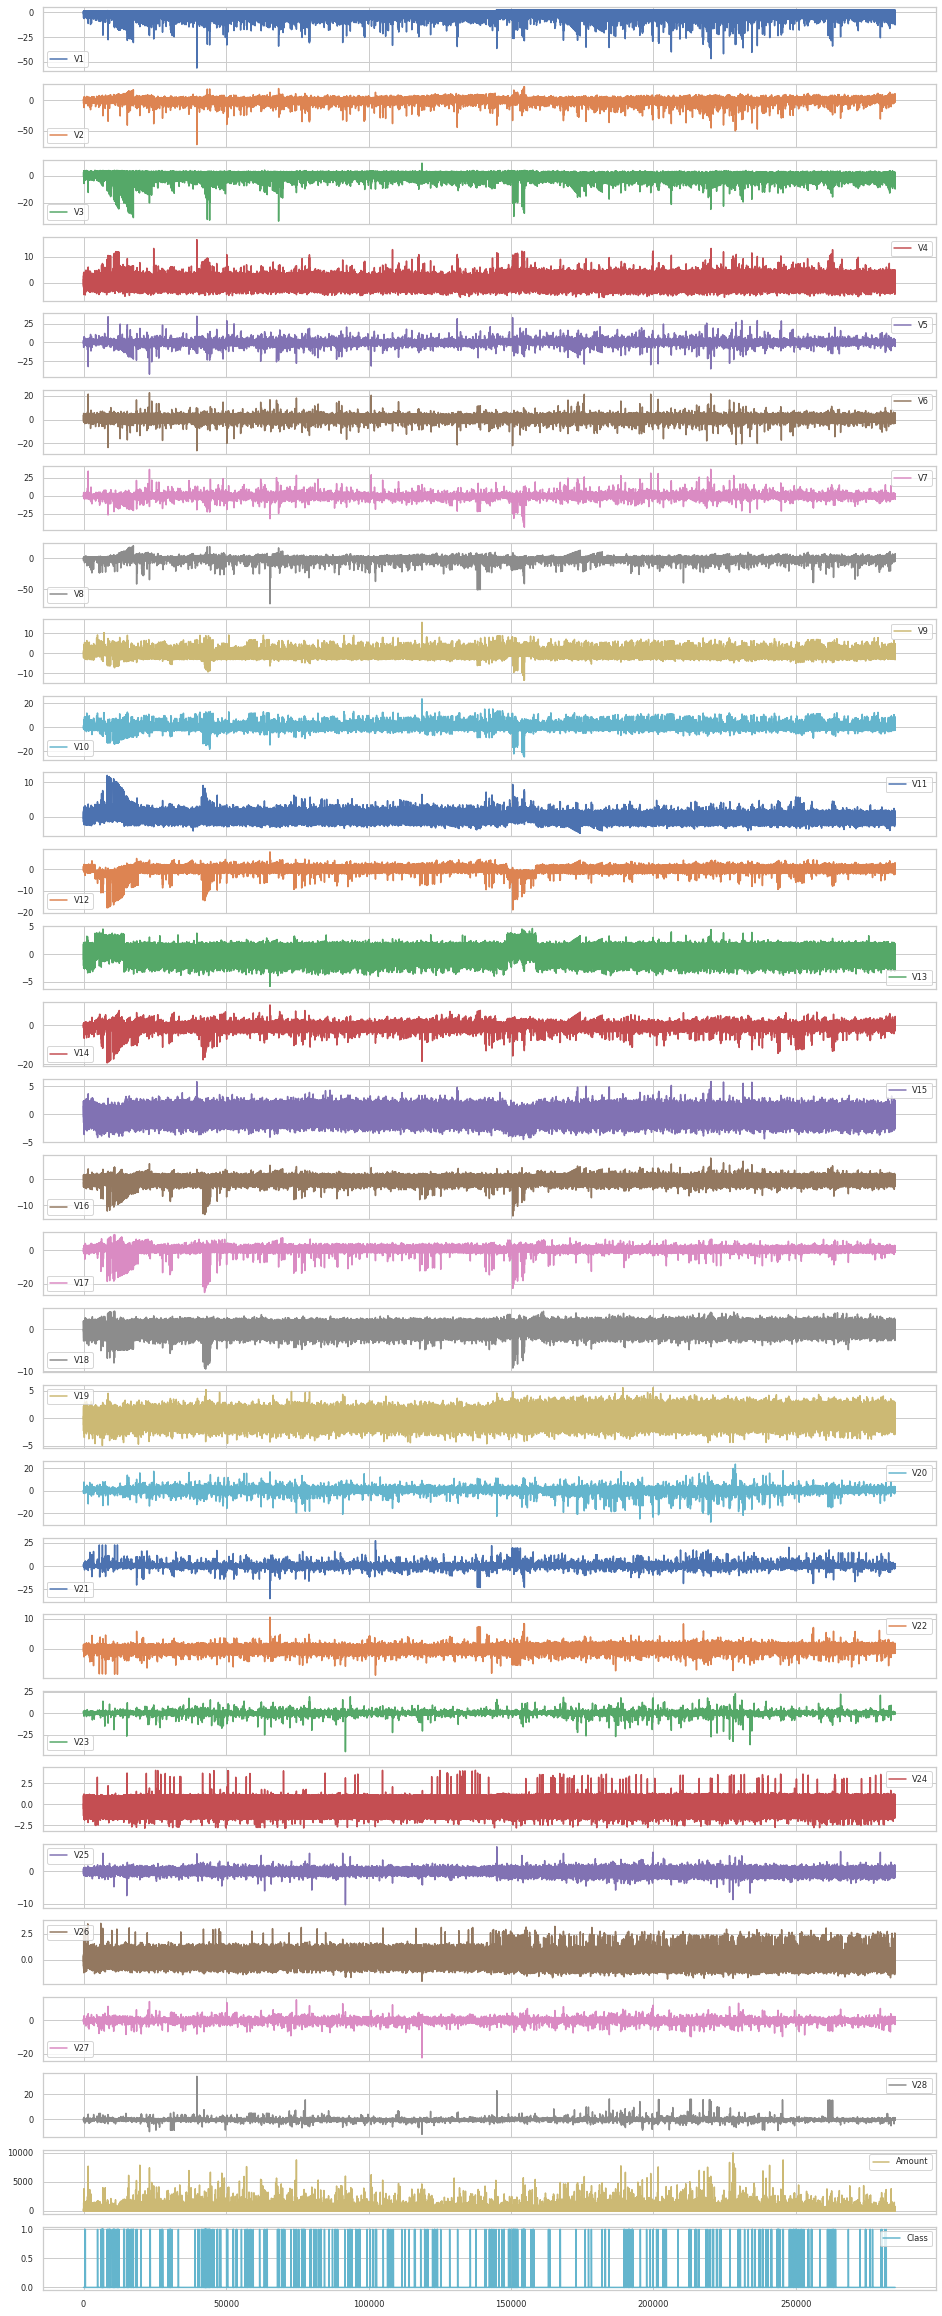

In [21]:
df.plot(subplots=True, figsize = (16, 42));

In [22]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000,283719.000000
mean,0.006560,-0.003130,0.002128,-0.003258,0.002644,-0.001588,0.000886,-0.000670,-0.001549,-0.001252,0.000162,-0.000676,0.000535,0.000210,0.000970,0.001059,0.000188,0.001464,-0.000199,-0.000164,-0.000453,0.000100,0.000410,0.000188,-0.000160,0.000162,0.001688,0.000565,88.083441,0.001667
std,1.943186,1.632223,1.504017,1.412811,1.356591,1.323807,1.200990,1.177769,1.095436,1.075692,1.018642,0.994480,0.995292,0.952003,0.914702,0.873045,0.842402,0.837246,0.812995,0.751899,0.721734,0.723676,0.620999,0.605565,0.520588,0.481920,0.391035,0.326516,236.386718,0.040797
min,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-4.932733,-28.009635,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,-0.915894,-0.600243,-0.889547,-0.850162,-0.689710,-0.769060,-0.552532,-0.208817,-0.644207,-0.535527,-0.761683,-0.406189,-0.647872,-0.425736,-0.581469,-0.466874,-0.483924,-0.498022,-0.456268,-0.211472,-0.228305,-0.542681,-0.161692,-0.354456,-0.317475,-0.326749,-0.070633,-0.052818,5.600000,0.000000
50%,0.020423,0.063972,0.180037,-0.022275,-0.053411,-0.275208,0.040837,0.021910,-0.052596,-0.093223,-0.032316,0.139070,-0.012947,0.050189,0.049279,0.067088,-0.065868,-0.002162,0.003381,-0.062367,-0.029445,0.006675,-0.011154,0.041012,0.016300,-0.052169,0.001480,0.011287,22.000000,0.000000
75%,1.316076,0.800292,1.027004,0.739525,0.612232,0.396589,0.570450,0.325720,0.595984,0.453642,0.739543,0.616956,0.663132,0.492273,0.650019,0.523491,0.398958,0.501936,0.458506,0.133191,0.186185,0.528245,0.147751,0.439705,0.350667,0.240261,0.091207,0.078273,77.505000,0.000000
max,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,8.289890,9.253526,4.295648,5.591971,23.643417,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,10000.000000,1.000000


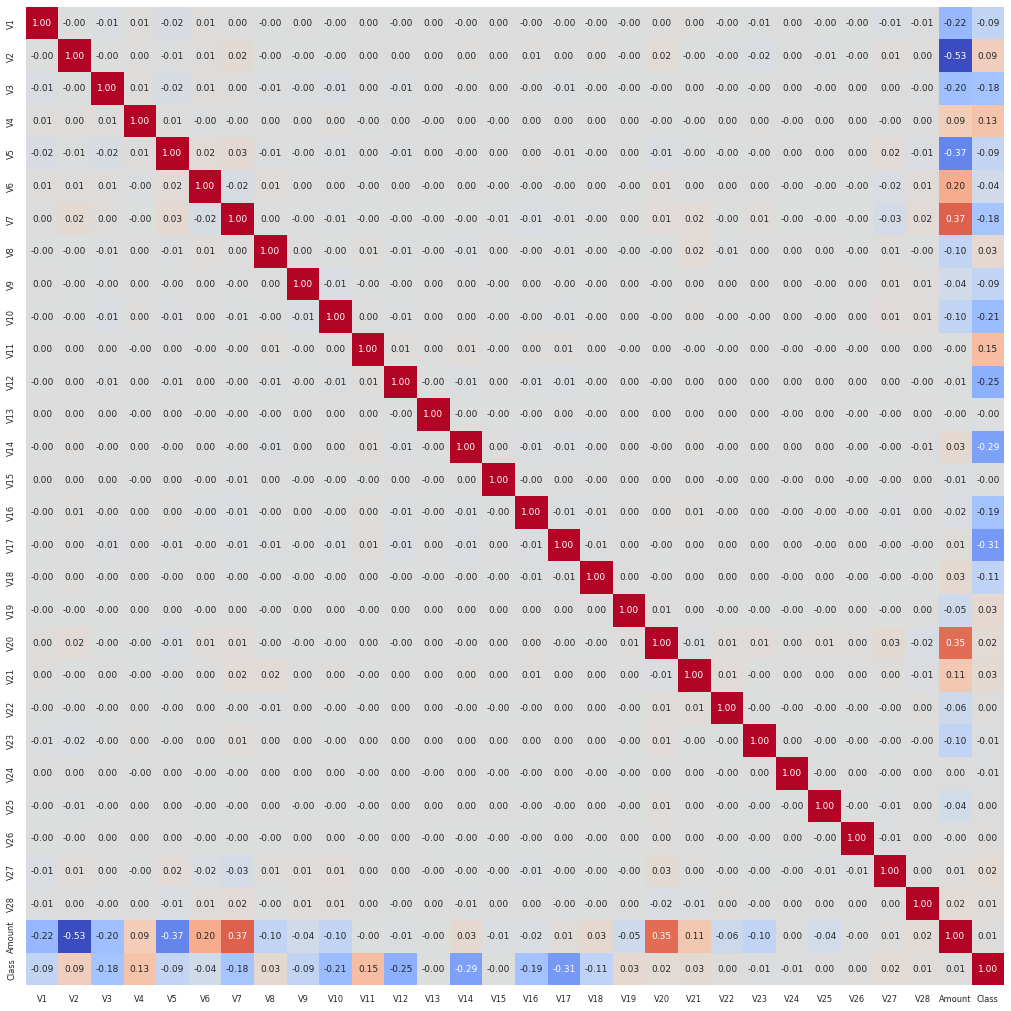

In [23]:
plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), fmt=".2f", annot=True, square=True, cmap='coolwarm', vmin=-0.5, vmax=0.5, cbar=False);

Как видим, часть признаков имеет явную связь с целевой переменной.

Возможно, имеет смысл удалить коррелирующий со многими другими признак 'Amount'. 

In [ ]:
# df.drop('Amount', axis = 1, inplace = True)

In [24]:
rnd_st = 410

Разделим датасет на train и test части, сохранив соотношение классов.

In [25]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=rnd_st)

In [26]:
df_train.shape

(226975, 30)

In [27]:
df_test.shape

(56744, 30)

In [28]:
df_train['Class'].value_counts()

0    226597
1       378
Name: Class, dtype: int64

In [29]:
df_test['Class'].value_counts()

0    56649
1       95
Name: Class, dtype: int64

In [30]:
X_train = np.array(df_train[df_train.columns[:-1]])
y_train = np.array(df_train[df_train.columns[-1]])
X_test = np.array(df_test[df_test.columns[:-1]])
y_test = np.array(df_test[df_test.columns[-1]])

In [31]:
def ShowHeat(y_pred, y_real = y_test):
    sns.set(font_scale=1.5)

    fig = plt.figure(figsize=(8,8))
    nn_mtx = metrics.confusion_matrix(y_real, y_pred)
    print(nn_mtx)
    font = {'weight' : 'bold', 'size'   :22}
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20) 
    sns.heatmap(nn_mtx, annot=True, fmt="d", 
                xticklabels=['ноль (0)', 'один (1)'], 
                yticklabels=['ноль (0)', 'один (1)'],
                cmap='coolwarm', vmin=0)
    #           cmap="rocket")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()
    print(metrics.classification_report(y_real, y_pred))

In [32]:
lr_pipe = Pipeline([('scale', StandardScaler()),
                ('alg', LogisticRegression(max_iter=1e4, n_jobs=-1))])

lrb_pipe = Pipeline([('scale', StandardScaler()),
                ('alg', LogisticRegression(class_weight='balanced', max_iter=1e4, n_jobs=-1))])

In [33]:
X_train.shape

(226975, 29)

In [34]:
y_train.shape

(226975,)

In [35]:
y_test.shape

(56744,)

In [36]:
X_test.shape

(56744, 29)

В качестве отправной точки посмотрим как справляются с задачей алгоритмы логистической регрессии и случайного леса без учёта и с учётом разбалансировки классов.

### LogisticRegression

[[56638    11]
 [   45    50]]


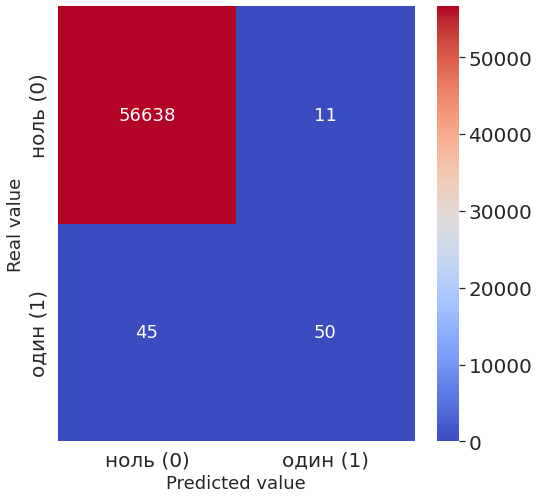

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.82      0.53      0.64        95

    accuracy                           1.00     56744
   macro avg       0.91      0.76      0.82     56744
weighted avg       1.00      1.00      1.00     56744



In [44]:
lr_pipe.fit(X_train, y_train)
lr_pipe_pred = lr_pipe.predict(X_test)
ShowHeat(lr_pipe_pred)

[[55239  1410]
 [    6    89]]


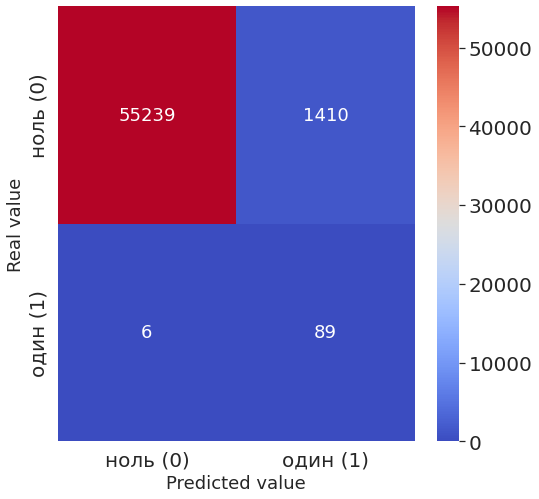

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56649
           1       0.06      0.94      0.11        95

    accuracy                           0.98     56744
   macro avg       0.53      0.96      0.55     56744
weighted avg       1.00      0.98      0.99     56744



In [45]:
lrb_pipe.fit(X_train, y_train)
lrb_pipe_pred = lrb_pipe.predict(X_test)
ShowHeat(lrb_pipe_pred)

In [39]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn import pipeline as pl
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.metrics import classification_report_imbalanced
#brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)

In [47]:
rf = RandomForestClassifier(n_jobs=-1)

rfb = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

brfc = BalancedRandomForestClassifier(random_state=rnd_st, n_jobs=-1)

### RandomForest

[[56643     6]
 [   29    66]]


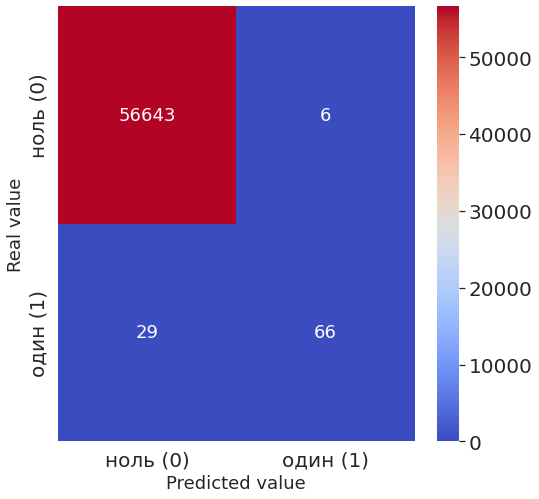

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.92      0.69      0.79        95

    accuracy                           1.00     56744
   macro avg       0.96      0.85      0.90     56744
weighted avg       1.00      1.00      1.00     56744



In [48]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test) 
ShowHeat(rf_pred)

[[56642     7]
 [   27    68]]


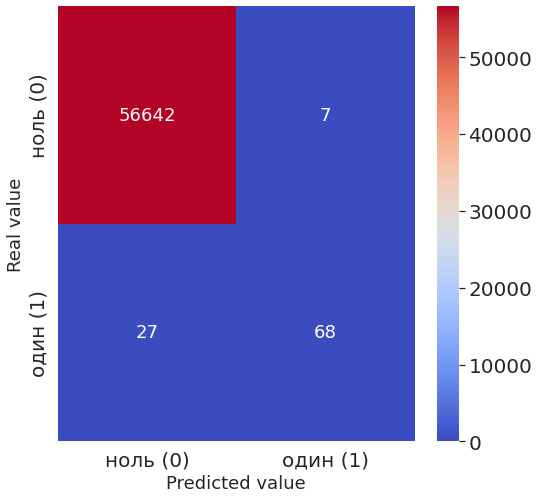

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56649
           1       0.91      0.72      0.80        95

    accuracy                           1.00     56744
   macro avg       0.95      0.86      0.90     56744
weighted avg       1.00      1.00      1.00     56744



In [49]:
rfb.fit(X_train, y_train)
rfb_pred = rfb.predict(X_test) 
ShowHeat(rfb_pred)

[[55455  1194]
 [    7    88]]


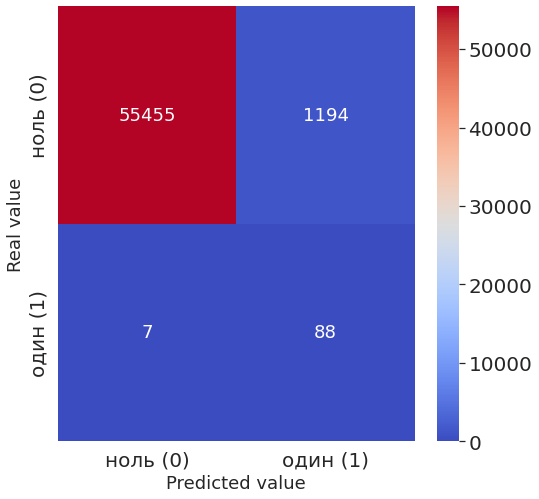

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56649
           1       0.07      0.93      0.13        95

    accuracy                           0.98     56744
   macro avg       0.53      0.95      0.56     56744
weighted avg       1.00      0.98      0.99     56744



In [50]:
brfc.fit(X_train, y_train)
brfc_pred = brfc.predict(X_test)
ShowHeat(brfc_pred)


Кажется что случайный лес справляется вполне неплохо. 

Но, посмотрим, можно ли увеличить recall сохранив precision на достаточно высоком уровне.

Будем применять TomekLinks в сочетании со SMOTE. Задавая баланс классов, посмотрим как будут меняться метрики различных алгоритмов.


In [51]:
smp_strat = np.linspace(0.002, 0.5, 25)
smp_strat

array([0.002  , 0.02275, 0.0435 , 0.06425, 0.085  , 0.10575, 0.1265 ,
       0.14725, 0.168  , 0.18875, 0.2095 , 0.23025, 0.251  , 0.27175,
       0.2925 , 0.31325, 0.334  , 0.35475, 0.3755 , 0.39625, 0.417  ,
       0.43775, 0.4585 , 0.47925, 0.5    ])

In [64]:
smp_strat = [0.002, 0.008, 0.02, 0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

In [65]:
def ssmeasure(estim):
    mprec = []
    mrec = []
    mf1 = []
    for ss in smp_strat:
        pipe = pl.make_pipeline(StandardScaler(),
                           SMOTETomek(sampling_strategy=ss, random_state=rnd_st, tomek=TomekLinks(sampling_strategy='majority'), n_jobs=-1),
                           estim)    
        pipe.fit(X_train, y_train)
        pipe_pred = pipe.predict(X_test)
        prec = precision_score(y_test, pipe_pred)
        mprec.append(prec)
        rec = recall_score(y_test, pipe_pred)
        mrec.append(rec)
        f1 = f1_score(y_test, pipe_pred)
        mf1.append(f1)
        print(f'ss={ss:.5} | prec={prec:.3} | rec={rec:.3} | f1={f1:.3}')
    
    return mprec, mrec, mf1

In [66]:
sslr_prec, sslr_rec, ss_f1 = ssmeasure(LogisticRegression(max_iter=1e4, n_jobs=-1))                    

ss=0.002 | prec=0.833 | rec=0.579 | f1=0.683
ss=0.008 | prec=0.767 | rec=0.726 | f1=0.746
ss=0.02 | prec=0.727 | rec=0.758 | f1=0.742
ss=0.05 | prec=0.63 | rec=0.789 | f1=0.701
ss=0.1 | prec=0.397 | rec=0.832 | f1=0.537
ss=0.2 | prec=0.2 | rec=0.853 | f1=0.325
ss=0.4 | prec=0.131 | rec=0.884 | f1=0.228
ss=0.6 | prec=0.0918 | rec=0.916 | f1=0.167
ss=0.8 | prec=0.0676 | rec=0.926 | f1=0.126
ss=1.0 | prec=0.0551 | rec=0.926 | f1=0.104


In [69]:
sslr_f1 = ss_f1

In [87]:
sslrb_prec, sslrb_rec, sslrb_f1 = ssmeasure(LogisticRegression(class_weight='balanced', max_iter=1e4, n_jobs=-1)) 

ss=0.002 | prec=0.0534 | rec=0.937 | f1=0.101
ss=0.008 | prec=0.054 | rec=0.937 | f1=0.102
ss=0.02 | prec=0.0506 | rec=0.937 | f1=0.096
ss=0.05 | prec=0.0532 | rec=0.926 | f1=0.101
ss=0.1 | prec=0.0538 | rec=0.926 | f1=0.102
ss=0.2 | prec=0.0552 | rec=0.926 | f1=0.104
ss=0.4 | prec=0.0549 | rec=0.926 | f1=0.104
ss=0.6 | prec=0.055 | rec=0.926 | f1=0.104
ss=0.8 | prec=0.0547 | rec=0.926 | f1=0.103
ss=1.0 | prec=0.0551 | rec=0.926 | f1=0.104


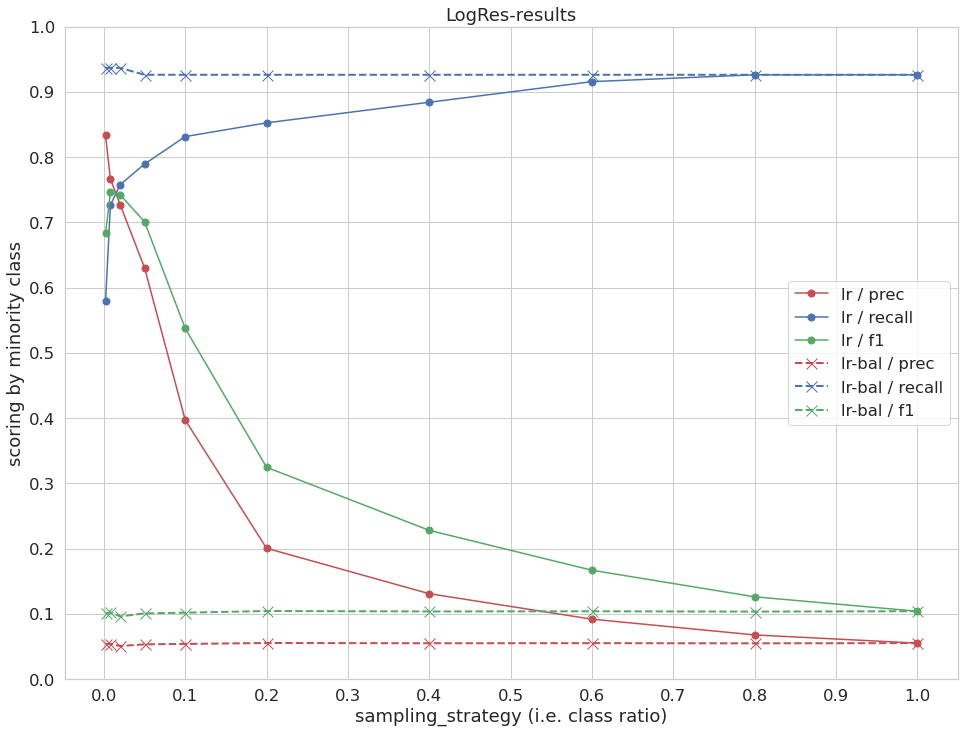

In [98]:
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(16, 12))
plt.grid(True)

plt.plot(smp_strat, sslr_prec, 'ro-', ms=7, label='LogReg / prec')
plt.plot(smp_strat, sslr_rec, 'bo-', ms=7, label='LogReg / recall')
plt.plot(smp_strat, sslr_f1, 'go-', ms=7, label='LogReg / f1')

plt.plot(smp_strat, sslrb_prec, 'rx--', ms=11, lw=2, label='LogReg-bal / prec')
plt.plot(smp_strat, sslrb_rec, 'bx--', ms=11, lw=2, label='LogReg-bal / recall')
plt.plot(smp_strat, sslrb_f1, 'gx--', ms=11, lw=2, label='LogReg-bal / f1')

# plt.plot(smp_strat, sslr_f1, 'rs--', ms=11, label='euclidean / uniform')
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('sampling_strategy (i.e. class ratio)')
plt.ylabel('scoring by minority class')
plt.ylim(0,1)
plt.legend()
plt.title('LogRes-results')
plt.show()

In [101]:
def ssmeasure_f(estim):
    mprec = []
    mrec = []
    mf1 = []
    for ss in smp_strat:
        pipe = pl.make_pipeline(SMOTETomek(sampling_strategy=ss, random_state=rnd_st, tomek=TomekLinks(sampling_strategy='majority'), n_jobs=-1),
                           estim)    
        pipe.fit(X_train, y_train)
        pipe_pred = pipe.predict(X_test)
        prec = precision_score(y_test, pipe_pred)
        mprec.append(prec)
        rec = recall_score(y_test, pipe_pred)
        mrec.append(rec)
        f1 = f1_score(y_test, pipe_pred)
        mf1.append(f1)
        print(f'ss={ss:.5} | prec={prec:.3} | rec={rec:.3} | f1={f1:.3}')
    
    return mprec, mrec, mf1

In [102]:
ssrf_prec, ssrf_rec, ssrf_f1 = ssmeasure_f(rf) 

ss=0.002 | prec=0.885 | rec=0.726 | f1=0.798
ss=0.008 | prec=0.872 | rec=0.789 | f1=0.829
ss=0.02 | prec=0.86 | rec=0.779 | f1=0.818
ss=0.05 | prec=0.856 | rec=0.811 | f1=0.832
ss=0.1 | prec=0.844 | rec=0.8 | f1=0.822
ss=0.2 | prec=0.826 | rec=0.8 | f1=0.813
ss=0.4 | prec=0.856 | rec=0.811 | f1=0.832
ss=0.6 | prec=0.846 | rec=0.811 | f1=0.828
ss=0.8 | prec=0.856 | rec=0.811 | f1=0.832
ss=1.0 | prec=0.854 | rec=0.8 | f1=0.826


In [103]:
ssrfb_prec, ssrfb_rec, ssrfb_f1 = ssmeasure_f(rfb) 

ss=0.002 | prec=0.893 | rec=0.705 | f1=0.788
ss=0.008 | prec=0.889 | rec=0.758 | f1=0.818
ss=0.02 | prec=0.869 | rec=0.768 | f1=0.816
ss=0.05 | prec=0.852 | rec=0.789 | f1=0.82
ss=0.1 | prec=0.865 | rec=0.811 | f1=0.837
ss=0.2 | prec=0.852 | rec=0.789 | f1=0.82
ss=0.4 | prec=0.854 | rec=0.8 | f1=0.826
ss=0.6 | prec=0.846 | rec=0.811 | f1=0.828
ss=0.8 | prec=0.854 | rec=0.8 | f1=0.826
ss=1.0 | prec=0.846 | rec=0.811 | f1=0.828


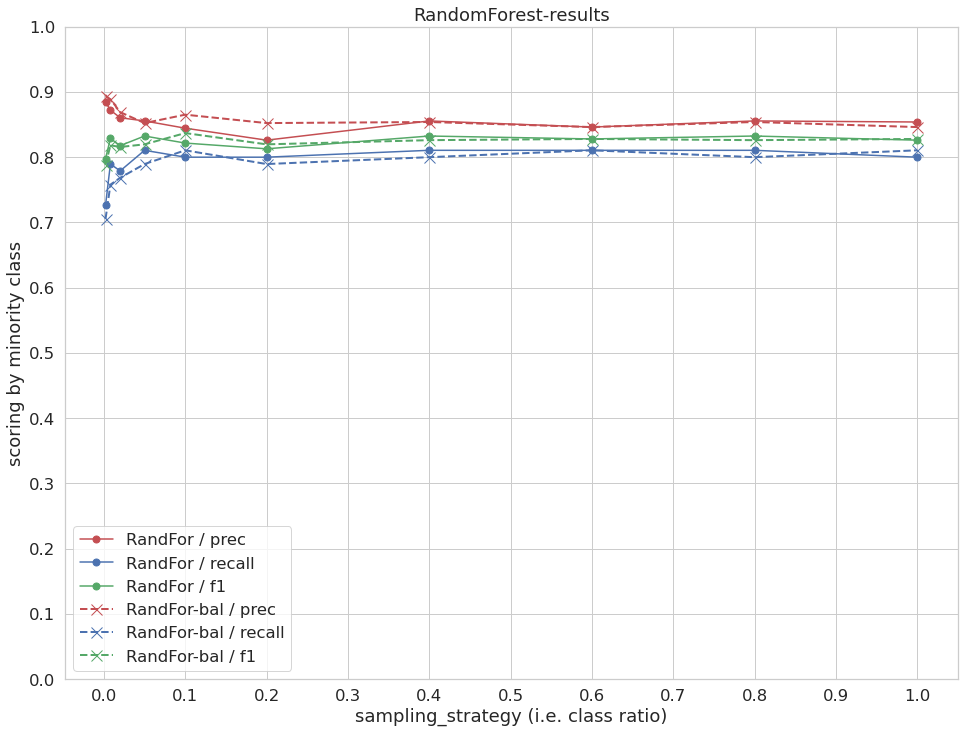

In [123]:
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(16, 12))
plt.grid(True)

plt.plot(smp_strat, ssrf_prec, 'ro-', ms=7, label='RandFor / prec')
plt.plot(smp_strat, ssrf_rec, 'bo-', ms=7, label='RandFor / recall')
plt.plot(smp_strat, ssrf_f1, 'go-', ms=7, label='RandFor / f1')

plt.plot(smp_strat, ssrfb_prec, 'rx--', ms=11, lw=2, label='RandFor-bal / prec')
plt.plot(smp_strat, ssrfb_rec, 'bx--', ms=11, lw=2, label='RandFor-bal / recall')
plt.plot(smp_strat, ssrfb_f1, 'gx--', ms=11, lw=2, label='RandFor-bal / f1')

# plt.plot(smp_strat, sslr_f1, 'rs--', ms=11, label='euclidean / uniform')
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('sampling_strategy (i.e. class ratio)')
plt.ylabel('scoring by minority class')
plt.ylim(0,1)
plt.legend()
plt.title('RandomForest-results')
plt.show()

In [104]:
ssbrfc_prec, ssbrfc_rec, ssbrfc_f1 = ssmeasure_f(brfc) 

ss=0.002 | prec=0.0743 | rec=0.905 | f1=0.137
ss=0.008 | prec=0.22 | rec=0.895 | f1=0.353
ss=0.02 | prec=0.319 | rec=0.884 | f1=0.469
ss=0.05 | prec=0.461 | rec=0.863 | f1=0.601
ss=0.1 | prec=0.59 | rec=0.832 | f1=0.69
ss=0.2 | prec=0.76 | rec=0.832 | f1=0.794
ss=0.4 | prec=0.821 | rec=0.821 | f1=0.821
ss=0.6 | prec=0.835 | rec=0.8 | f1=0.817
ss=0.8 | prec=0.844 | rec=0.8 | f1=0.822
ss=1.0 | prec=0.844 | rec=0.8 | f1=0.822


In [107]:
def ssmeasure_enn(estim):
    mprec = []
    mrec = []
    mf1 = []
    for ss in smp_strat:
        pipe = pl.make_pipeline(SMOTEENN(sampling_strategy=ss, random_state=rnd_st, n_jobs=-1),
                           estim)    
        pipe.fit(X_train, y_train)
        pipe_pred = pipe.predict(X_test)
        prec = precision_score(y_test, pipe_pred)
        mprec.append(prec)
        rec = recall_score(y_test, pipe_pred)
        mrec.append(rec)
        f1 = f1_score(y_test, pipe_pred)
        mf1.append(f1)
        print(f'ss={ss:.5} | prec={prec:.3} | rec={rec:.3} | f1={f1:.3}')
    
    return mprec, mrec, mf1

In [108]:
ssbrfc_enn_prec, ssbrfc_enn_rec, ssbrfc_enn_f1 = ssmeasure_enn(brfc) 

ss=0.002 | prec=0.579 | rec=0.811 | f1=0.675
ss=0.008 | prec=0.301 | rec=0.874 | f1=0.447
ss=0.02 | prec=0.38 | rec=0.863 | f1=0.527
ss=0.05 | prec=0.485 | rec=0.842 | f1=0.615
ss=0.1 | prec=0.598 | rec=0.832 | f1=0.696
ss=0.2 | prec=0.725 | rec=0.832 | f1=0.775
ss=0.4 | prec=0.79 | rec=0.832 | f1=0.81
ss=0.6 | prec=0.812 | rec=0.821 | f1=0.817
ss=0.8 | prec=0.839 | rec=0.821 | f1=0.83
ss=1.0 | prec=0.837 | rec=0.811 | f1=0.824


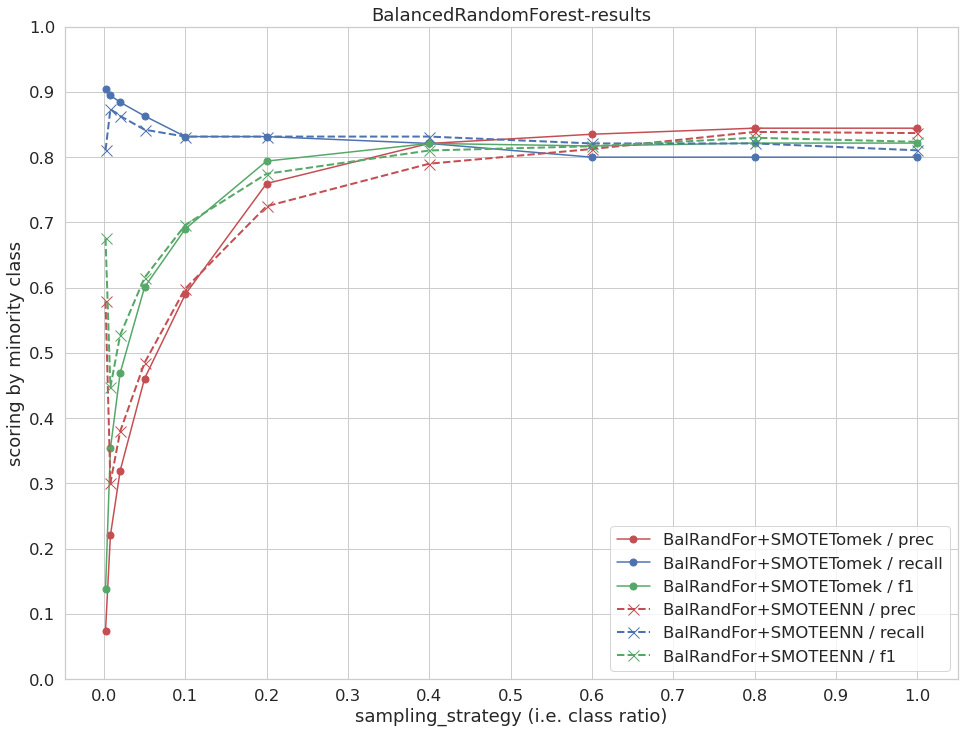

In [117]:
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(16, 12))
plt.grid(True)

plt.plot(smp_strat, ssbrfc_prec, 'ro-', ms=7, label='BalRandFor+SMOTETomek / prec')
plt.plot(smp_strat, ssbrfc_rec, 'bo-', ms=7, label='BalRandFor+SMOTETomek / recall')
plt.plot(smp_strat, ssbrfc_f1, 'go-', ms=7, label='BalRandFor+SMOTETomek / f1')

plt.plot(smp_strat, ssbrfc_enn_prec, 'rx--', ms=11, lw=2, label='BalRandFor+SMOTEENN / prec')
plt.plot(smp_strat, ssbrfc_enn_rec, 'bx--', ms=11, lw=2, label='BalRandFor+SMOTEENN / recall')
plt.plot(smp_strat, ssbrfc_enn_f1, 'gx--', ms=11, lw=2, label='BalRandFor+SMOTEENN / f1')

# plt.plot(smp_strat, sslr_f1, 'rs--', ms=11, label='euclidean / uniform')
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('sampling_strategy (i.e. class ratio)')
plt.ylabel('scoring by minority class')
plt.ylim(0,1)
plt.legend()
plt.title('BalancedRandomForest-results')
plt.show()

In [110]:
knn_grid_values = np.array(np.linspace(1, 49, 25), dtype='int')

In [112]:
knn_grid = {'weights': ['uniform', 'distance'],
           'n_neighbors': knn_grid_values,
           'metric': ['manhattan', 'euclidean']} 

knn_gs = GridSearchCV(KNN(), knn_grid, cv=5, n_jobs=-1, scoring='f1', verbose = 0)

In [118]:
ssknn_prec, ssknn_rec, ssknn_f1 = ssmeasure(KNN(n_jobs=-1))

ss=0.002 | prec=0.9 | rec=0.758 | f1=0.823
ss=0.008 | prec=0.768 | rec=0.8 | f1=0.784
ss=0.02 | prec=0.653 | rec=0.811 | f1=0.723
ss=0.05 | prec=0.55 | rec=0.811 | f1=0.655
ss=0.1 | prec=0.51 | rec=0.821 | f1=0.629
ss=0.2 | prec=0.488 | rec=0.832 | f1=0.615
ss=0.4 | prec=0.482 | rec=0.842 | f1=0.613
ss=0.6 | prec=0.482 | rec=0.842 | f1=0.613
ss=0.8 | prec=0.476 | rec=0.842 | f1=0.608
ss=1.0 | prec=0.479 | rec=0.842 | f1=0.611


In [114]:
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [119]:
ssbbcl_prec, ssbbcl_rec, ssbbcl_f1 = ssmeasure(BalancedBaggingClassifier(base_estimator=HistGradientBoostingClassifier(random_state=rnd_st),
                        n_estimators=100, random_state=rnd_st, n_jobs=-1))

ss=0.002 | prec=0.117 | rec=0.905 | f1=0.207
ss=0.008 | prec=0.239 | rec=0.884 | f1=0.376
ss=0.02 | prec=0.318 | rec=0.895 | f1=0.47
ss=0.05 | prec=0.404 | rec=0.884 | f1=0.554
ss=0.1 | prec=0.442 | rec=0.884 | f1=0.589
ss=0.2 | prec=0.497 | rec=0.884 | f1=0.636
ss=0.4 | prec=0.497 | rec=0.863 | f1=0.631
ss=0.6 | prec=0.509 | rec=0.874 | f1=0.643
ss=0.8 | prec=0.516 | rec=0.874 | f1=0.648
ss=1.0 | prec=0.522 | rec=0.874 | f1=0.654


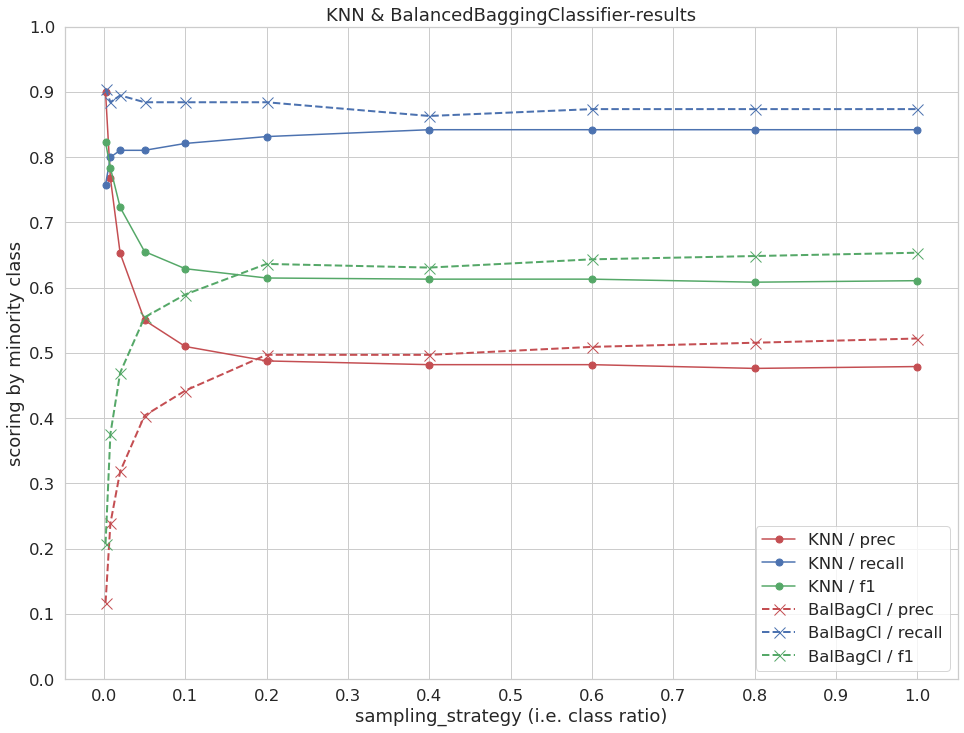

In [121]:
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(16, 12))
plt.grid(True)

plt.plot(smp_strat, ssknn_prec, 'ro-', ms=7, label='KNN / prec')
plt.plot(smp_strat, ssknn_rec, 'bo-', ms=7, label='KNN / recall')
plt.plot(smp_strat, ssknn_f1, 'go-', ms=7, label='KNN / f1')

plt.plot(smp_strat, ssbbcl_prec, 'rx--', ms=11, lw=2, label='BalBagCl / prec')
plt.plot(smp_strat, ssbbcl_rec, 'bx--', ms=11, lw=2, label='BalBagCl / recall')
plt.plot(smp_strat, ssbbcl_f1, 'gx--', ms=11, lw=2, label='BalBagCl / f1')

# plt.plot(smp_strat, sslr_f1, 'rs--', ms=11, label='euclidean / uniform')
plt.xticks(np.linspace(0,1,11))
plt.yticks(np.linspace(0,1,11))
plt.xlabel('sampling_strategy (i.e. class ratio)')
plt.ylabel('scoring by minority class')
plt.ylim(0,1)
plt.legend()
plt.title('KNN & BalancedBaggingClassifier-results')
plt.show()

Логистическая регрессия показывает худшие метрики из всех исследованных алгоритмов. Искусственная балансировка классов ситуацию не улучшают.

Применение алгоритмов на основе леса позволило получить лучшие метрики.
Так же эти алгоритмы наряду с KNN и BalancedBaggingClassifier положительно реагируют на применение балансировки классов.

Для исследованных алгоритмов кривые (prec, recall и f1) стабилизируются при соотношении классов от 0.2 до 0.5, вероятно, эти цифры можно принять за ориентировочные при определении необходимости использования стратегий сэмплинга в условиях несбалансированных классов.

Sampling_strategy = 1 следует признать оптимальным выбором при увеличении числа примеров миноритарного класса. 